<a href="https://colab.research.google.com/github/gunaydinrumeysa/EmKa-Akademi-Bitirme-Projesi/blob/main/CarAcceptability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EmKa Akademi Bitirme Projesi
Hedefimiz aracın özelliklerine bakarak arabanın almaya ne kadar değer bir araba olduğunu tespit etmek.

Amaç bunu yüksek oranlarda tespit eden bir model kurmak.

# Kütüphaneler

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import plot_tree

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Verisetini Yükleme

In [3]:
data = pd.read_csv('/content/car_acceptability.txt', header = None)
data.columns = ['Price', 'Maintenance', 'Doors', 'Capacity', 'Size', 'Safety', 'Outcome']
data.head()

,Price,Maintenance,Doors,Capacity,Size,Safety,Outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,?,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,?,unacc


In [4]:
data.shape

(1729, 7)

In [5]:
data.tail()

,Price,Maintenance,Doors,Capacity,Size,Safety,Outcome
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood
1728,?,?,?,?,?,?,?


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Price        1728 non-null   object
 1   Maintenance  1729 non-null   object
 2   Doors        1729 non-null   object
 3   Capacity     1729 non-null   object
 4   Size         1729 non-null   object
 5   Safety       1728 non-null   object
 6   Outcome      1729 non-null   object
dtypes: object(7)
memory usage: 94.7+ KB


In [7]:
data.isna().sum()
# Eksik değerleri olan 2 sütun var.

Price          1
Maintenance    0
Doors          0
Capacity       0
Size           0
Safety         1
Outcome        0
dtype: int64

# Eksik Değerleri İşleme

In [8]:
q_mark = [col for col in data.columns if (data[col] == "?").any()]    # İçinde "?" olan columnları döndürmüş oldum.
q_mark

['Price', 'Maintenance', 'Doors', 'Capacity', 'Size', 'Safety', 'Outcome']

In [9]:
data = data.replace("?", pd.NA)
data = data.dropna()
# '?' olan çok fazla veri var, farklı bir şekilde doldurmaya çalıştım başaramadım, mecburen sildim.

In [10]:
data.head()

,Price,Maintenance,Doors,Capacity,Size,Safety,Outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
3,vhigh,vhigh,2,2,med,low,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc


In [11]:
data.shape

(1718, 7)

In [12]:
data['Price'].value_counts()
# Yazımı hatalı olanları low olarak değiştiriyorum.

high     432
low      429
med      428
vhigh    427
-          1
düsük      1
Name: Price, dtype: int64

In [13]:
data['Price'] = data['Price'].str.replace('-', 'low')

In [14]:
data['Price']= data['Price'].str.replace('düsük', 'low')

In [15]:
data['Price'].value_counts()

high     432
low      431
med      428
vhigh    427
Name: Price, dtype: int64

In [16]:
data['Maintenance'].value_counts()

low      432
med      431
high     430
vhigh    425
Name: Maintenance, dtype: int64

In [17]:
data['Doors'].value_counts()
# Yazımı hatalı olanları doğrusuyla değiştiriyorum.

3        432
4        430
5more    429
2        424
44         1
iki        1
5+         1
Name: Doors, dtype: int64

In [18]:
data['Doors'] = data['Doors'].str.replace('5more', '5-more')

In [19]:
data['Doors'].value_counts()

3         432
4         430
5-more    429
2         424
44          1
iki         1
5+          1
Name: Doors, dtype: int64

In [20]:
data['Doors'] = data['Doors'].str.replace('44', '4')

In [21]:
data['Doors'].value_counts()

3         432
4         431
5-more    429
2         424
iki         1
5+          1
Name: Doors, dtype: int64

In [22]:
data['Doors'] = data['Doors'].str.replace('iki', '2')

In [23]:
data['Doors'].value_counts()

3         432
4         431
5-more    429
2         425
5+          1
Name: Doors, dtype: int64

In [24]:
data['Doors'] = data['Doors'].replace(['5+'], ['5-more'])

In [25]:
data['Doors'].value_counts()

3         432
4         431
5-more    430
2         425
Name: Doors, dtype: int64

In [26]:
data['Capacity'].value_counts()

4       575
more    573
2       570
Name: Capacity, dtype: int64

In [27]:
data['Size'].value_counts()

small    575
big      573
med      570
Name: Size, dtype: int64

In [28]:
data['Safety'].value_counts()
# Yazımı hatalı olanları low olarak değiştiriyorum.

high    574
med     572
low     569
-         2
*         1
Name: Safety, dtype: int64

In [29]:
data['Safety'] = data['Safety'].str.replace('-', 'low')

In [ ]:
data['Safety'] = data['Safety'].str.replace('*', 'low')

In [31]:
data['Safety'].value_counts()

high    574
low     572
med     572
Name: Safety, dtype: int64

In [33]:
data['Outcome'].value_counts()
# Verisetimizin multiclass ve imbalance bir data olduğunu düşünüyorum.
# Dengesiz veriseti olduğu için model kurarken stratify y parametresi uygulamalıyım.

unacc    1201
acc       383
good       69
vgood      65
Name: Outcome, dtype: int64

In [34]:
data.head()

,Price,Maintenance,Doors,Capacity,Size,Safety,Outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
3,vhigh,vhigh,2,2,med,low,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc


# Kategorik Değişkenleri Kodlama



In [ ]:
# Manuel encoding yaptım burda, korelasyonu yakalayabilmek için. Otomatik encoderlarla yaparsam belki farklı sırada verebilirdi diye.

In [35]:
data['Price'] = data['Price'].replace(['low' , 'med' , 'high' , 'vhigh'] , [0 , 1 , 2 , 3])

In [36]:
data['Maintenance'] = data['Maintenance'].replace(['low' , 'med' , 'high' , 'vhigh'] , [0 , 1 , 2 , 3])

In [37]:
data['Doors'] = data['Doors'].replace(['2' , '3' , '4' , '5-more'] , [0 , 1 , 2 , 3])

In [38]:
data['Capacity'] = data['Capacity'].replace(['2' , '4' , 'more'] , [0 , 1 , 2])

In [39]:
data['Size'] = data['Size'].replace(['small' , 'med' , 'big'] , [0 , 1 , 2])

In [40]:
data['Safety'] = data['Safety'].replace(['low' , 'med' , 'high'] , [0 , 1 , 2])

In [41]:
data.head()

,Price,Maintenance,Doors,Capacity,Size,Safety,Outcome
0,3,3,0,0,0,0,unacc
1,3,3,0,0,0,1,unacc
3,3,3,0,0,1,0,unacc
5,3,3,0,0,1,2,unacc
6,3,3,0,0,2,0,unacc


In [42]:
# Target sütunu için encode işlemi gerekiyor. Manuel encoding yapıyorum.

data['Outcome'] = data['Outcome'].replace(['unacc', 'acc', 'good', 'vgood'], [0, 1, 2, 3])

In [27]:
'''
Target değişkeni kodlama
label_mapping = {"unacc": 0, "acc": 1, "good": 2, "vgood": 3}
data["Outcome"] = data["Outcome"].map(label_mapping)
'''

In [43]:
data.head()

,Price,Maintenance,Doors,Capacity,Size,Safety,Outcome
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
3,3,3,0,0,1,0,0
5,3,3,0,0,1,2,0
6,3,3,0,0,2,0,0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1718 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Price        1718 non-null   int64
 1   Maintenance  1718 non-null   int64
 2   Doors        1718 non-null   int64
 3   Capacity     1718 non-null   int64
 4   Size         1718 non-null   int64
 5   Safety       1718 non-null   int64
 6   Outcome      1718 non-null   int64
dtypes: int64(7)
memory usage: 107.4 KB


<Axes: >

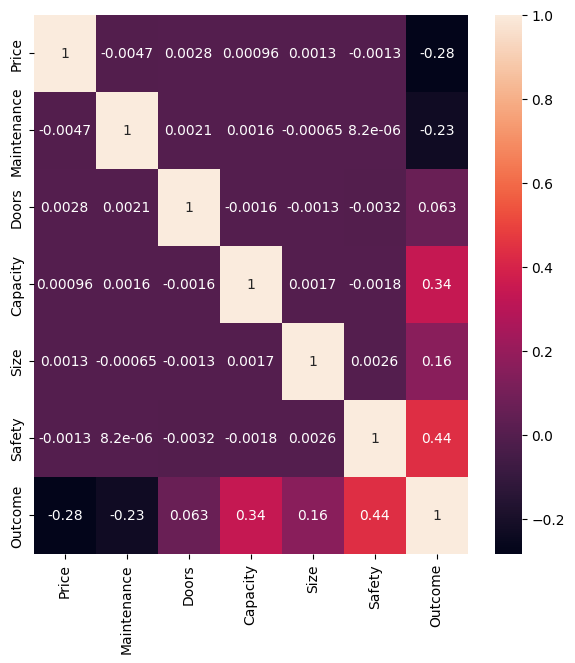

In [45]:
plt.figure(figsize = (7,7))
sns.heatmap(data.corr(), annot = True)
# Regresyon tasklerinde korelasyon matrisi çok daha önemliydi. Ama sınıflandırma projelerinde de bakılabilir diye baktım.
# Elimizde dengesiz bir veriseti olduğu için hedef değişkenimizle ilişkili olan sütun oldukça az görünüyor.
# 'Outcome' ile 'Safety' ve 'Capacity' biraz ilişkili görünüyor.

In [46]:
data.describe()
# Mean ile % 50 nin değerleri birbirine yakın gibi. Outlierların çok fazla olmadığı yorumunu yapabilirim.

,Price,Maintenance,Doors,Capacity,Size,Safety,Outcome
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,1.497672,1.493597,1.504075,1.001746,0.998836,1.001164,0.416764
std,1.117836,1.117299,1.116267,0.815900,0.817684,0.816971,0.742109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
75%,2.000000,2.000000,2.750000,2.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


# Data Visualization

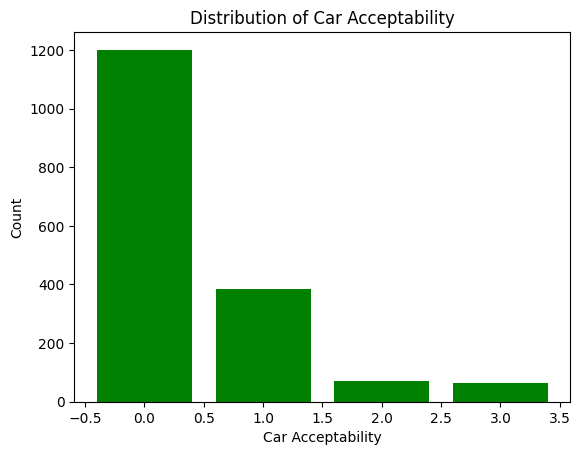

In [48]:
car_counts = data['Outcome'].value_counts()
plt.bar(car_counts.index, car_counts.values, color= 'green')
plt.title('Distribution of Car Acceptability')
plt.xlabel('Car Acceptability')
plt.ylabel('Count')

plt.show()

In [ ]:
# Alınması kabul edilemeyen arabaların sayısı oldukça fazla görünüyor.

In [49]:
data.head()

,Price,Maintenance,Doors,Capacity,Size,Safety,Outcome
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
3,3,3,0,0,1,0,0
5,3,3,0,0,1,2,0
6,3,3,0,0,2,0,0


<Axes: xlabel='Capacity', ylabel='Safety'>

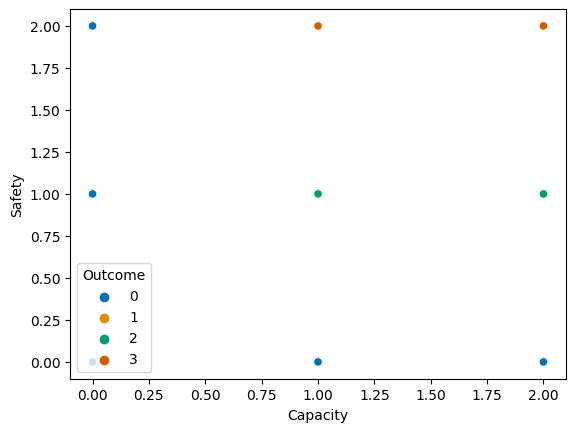

In [50]:
sns.scatterplot(data=data, x = 'Capacity', y = 'Safety', hue='Outcome', palette='colorblind')
# Açıkçası çok anlamlı gelmedi, yorumlayamadım.

# Boyut İndirgeme LDA



In [ ]:
# Görselleştirme amacıyla yaptım.

In [51]:
features = data.drop('Outcome' , axis = 1)
target = data['Outcome']

lda = LinearDiscriminantAnalysis(n_components= 2)
lda_result = lda.fit_transform(features, target)

In [52]:
lda_data = pd.DataFrame(lda_result, columns= ['LDA Component 1' , 'LDA Component 2'])
lda_data['Outcome'] = target

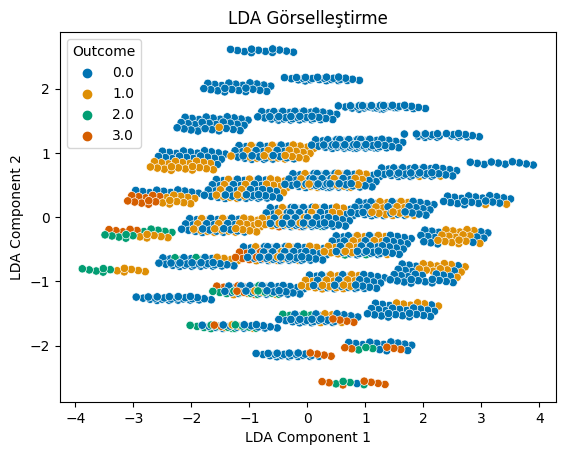

In [53]:
sns.scatterplot(x='LDA Component 1', y='LDA Component 2', hue='Outcome', data=lda_data, palette='colorblind')
plt.title('LDA Görselleştirme')
plt.show()

# Train and Test Split

In [54]:
X = data.drop('Outcome', axis = 1)     # Features
y = data['Outcome']                    # Target

In [55]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2,
                                                       random_state=42,
                                                       shuffle = True,
                                                       stratify= y)

In [56]:
print(f"X'in shape'i {X.shape}")
print(f"X_train'in shape'i {X_train.shape}")
print(f"X_test'in shape'i {X_test.shape}")

X'in shape'i (1718, 6)
X_train'in shape'i (1374, 6)
X_test'in shape'i (344, 6)


In [337]:
# 1374 tane ile eğiteceğim 344 tanenin cevaplarını(y_testi) hiç bilmiyormuş gibi yapıcam.

In [57]:
y_train.value_counts()
# Datam imbalance olmasına rağmen 'stratify= y' çok işe yaramadı sanki.

0    961
1    306
2     55
3     52
Name: Outcome, dtype: int64

# Modelleri Deneme

# Decision Tree

In [58]:
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  splitter = 'best',
                                  max_depth = 7,
                                  min_samples_split = 5,
                                  max_features = 6,
                                  random_state = 42
                                  )

In [59]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_features=6, min_samples_split=5,
                       random_state=42)

In [60]:
dt_model_y_pred = dt_model.predict(X_test)

In [62]:
dt_model_y_pred # Modelimin tahmin sonuçları

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 3, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 3, 0, 0, 3, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0,

In [63]:
np.array(y_test) # Modelimin görmezden geldiğim gerçek sonuçları

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2,
       0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0,
       0, 1, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 3, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 3, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 3, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 1,
       0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0,

Değerlendirme Metrikleri

In [64]:
# Imbalance datalarda accuracy score bakmıyoruz.

In [65]:
accuracy_score(y_test, dt_model_y_pred)

0.9127906976744186

In [66]:
print(classification_report(y_test, dt_model_y_pred))  # Modelim % 91 oranında bilmiş.

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       240
           1       0.83      0.83      0.83        77
           2       0.67      0.57      0.62        14
           3       0.64      0.69      0.67        13

    accuracy                           0.91       344
   macro avg       0.78      0.77      0.77       344
weighted avg       0.91      0.91      0.91       344



In [67]:
confusion_matrix(y_test, dt_model_y_pred)

array([[233,   6,   1,   0],
       [  8,  64,   3,   2],
       [  0,   3,   8,   3],
       [  0,   4,   0,   9]])

In [349]:
# 0: Alınması kabul dilemez, 1: Alınabilir , 2: Alınırsa iyi olur , 3: Alınırsa çok iyi olur

# Hatalarımıza göz atalım...

# 6 tane veriye 0(Alınması kabul dilemez) demişim ama gerçekte 1(Alınabilir) çıkmış
# 1 tane veriye 0(Alınması kabul dilemez) demişim ama gerçekte 2(Alınırsa iyi olur) çıkmış

# 8 tane veriye 1 (Alınabilir) demişim, gerçekte 0(Alınması kabul dilemez) çıkmış.
# 3 tane veriye 1(Alınabilir) demişim gerçekte 2(Alınırsa iyi olur) çıkmış.
# 2 tane veriye 1(Alınabilir) demişim gerçekte 3(Alınırsa çok iyi olur) çıkmış.

# ...devamında da aynı şekilde hatalarımızı yorumlayabiliriz.


# Açıkçası modelimin hatasız çalıştığı olmamış. Modelim doğruyu bulmakta biraz zorlanmış.

In [70]:
cross_val_score(dt_model, X, y, cv=5)
# Imbalance data olduğu için cross validation yapmak lazım. Rastgeleliği arttırmek ve gerçekçi sonuçlar için.

array([0.76453488, 0.7994186 , 0.79069767, 0.83965015, 0.84548105])

In [71]:
cross_val_score(dt_model, X, y, cv=5).mean()
# Tahmin etmesi zor verilerle çalışmış.

0.807956471625195

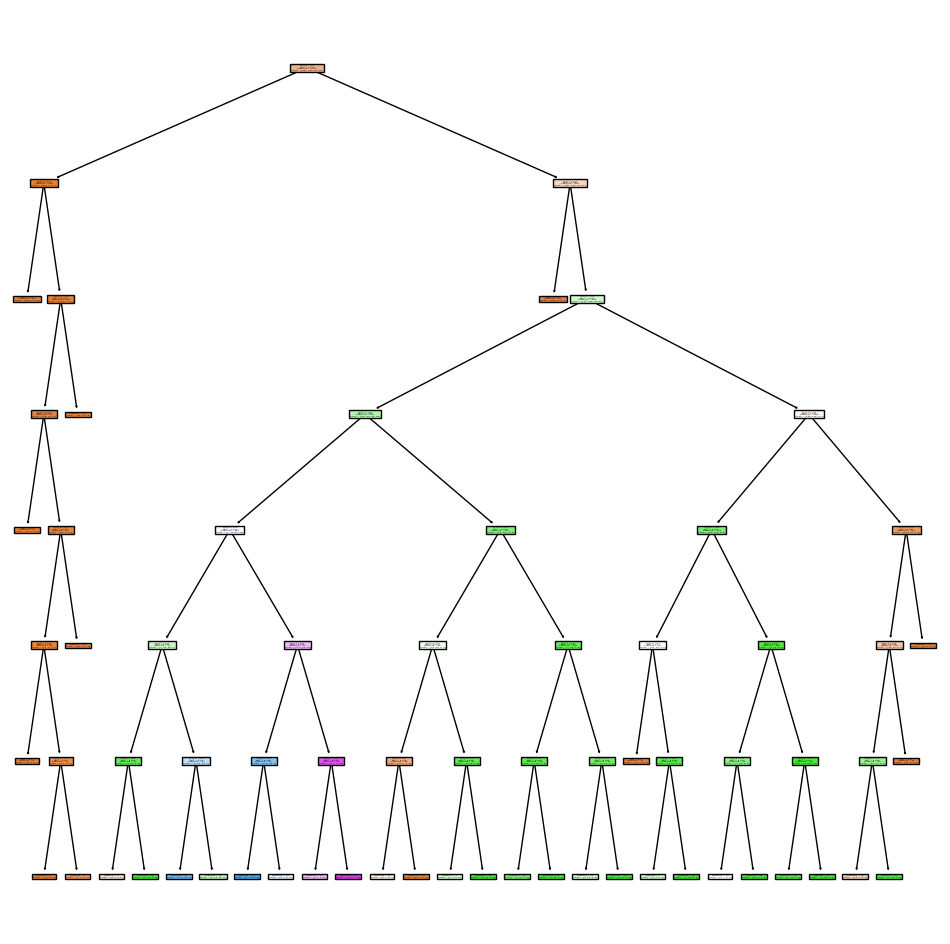

In [72]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(dt_model, ax=ax , filled = True)
plt.show()

# KNN

In [73]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [74]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [75]:
y_pred = knn_model.predict(X_test)

Değerlendirme Metrikleri

In [76]:
# Imbalance datalarda accuracy score bakmıyoruz.
accuracy_score(y_test, y_pred)

0.877906976744186

In [77]:
print(classification_report(y_test, y_pred))  # Modelim % 88 oranında bilmiş.

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       240
           1       0.88      0.66      0.76        77
           2       0.57      0.29      0.38        14
           3       1.00      0.85      0.92        13

    accuracy                           0.88       344
   macro avg       0.83      0.69      0.75       344
weighted avg       0.87      0.88      0.87       344



In [78]:
confusion_matrix(y_test, y_pred)

array([[236,   4,   0,   0],
       [ 23,  51,   3,   0],
       [  8,   2,   4,   0],
       [  1,   1,   0,  11]])

In [79]:
cross_val_score(knn_model, X, y, cv=5)

array([0.7122093 , 0.71511628, 0.77906977, 0.80466472, 0.85714286])

In [80]:
cross_val_score(knn_model, X, y, cv=5).mean()
# Tahmin etmesi zor verilerle çalışmış.

0.7736405858024273

**Bu kurduğum 2 modelden de istedğim sonucu alamadım. Başarılı olduğunu düşünmüyorum. Daha iyi tahminler yapabilirdi. Başka modeller deneyeceğim.**

# Random Forest

In [81]:
rf_model = RandomForestClassifier(n_estimators= 200,
                                  criterion = 'gini',
                                  max_depth = 7,
                                  min_samples_split = 3,
                                  max_features = 3,
                                  bootstrap = True,
                                  max_samples = 0.4
                                  )

In [82]:
rf_model.fit(X_train , y_train)

RandomForestClassifier(max_depth=7, max_features=3, max_samples=0.4,
                       min_samples_split=3, n_estimators=200)

In [83]:
rf_model_y_pred = rf_model.predict(X_test)
rf_model_y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,
       0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 3, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 3, 0, 0, 3, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 3, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0,

In [84]:
np.array(y_test)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2,
       0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0,
       0, 1, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 3, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 3, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 3, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 1,
       0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0,

Değerlendirme Metrikleri

In [ ]:
# Imbalance datalarda accuracy score bakmıyoruz.

In [85]:
accuracy_score(y_test , rf_model_y_pred)

0.9331395348837209

In [86]:
print(classification_report(y_test , rf_model_y_pred))  # Modelim % 93 oranında bilmiş.

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       240
           1       0.85      0.92      0.88        77
           2       0.82      0.64      0.72        14
           3       0.64      0.69      0.67        13

    accuracy                           0.93       344
   macro avg       0.82      0.81      0.81       344
weighted avg       0.94      0.93      0.93       344



In [87]:
confusion_matrix(y_test , rf_model_y_pred)
# Yine modelimin hatasız çalıştığı olmamış.

array([[232,   7,   1,   0],
       [  3,  71,   1,   2],
       [  0,   2,   9,   3],
       [  0,   4,   0,   9]])

In [88]:
cross_val_score(rf_model, X, y, cv=5).mean()

0.794580988541596

In [ ]:
# Kategorik verilerle iyi çalışan Catboost modelini denemek istedim ama ColabPro olmadığım için GPU çalıştıramadım.

# Modeller arasında en iyi sonucu %93 ile Random Forest Modelinden aldım.

# Elimdeki verisetinin özelliklerine bakarak modelim 'alınması kabul edilemez' olan arabaları tahmin etmede daha başarılı.

# Modeli Dışarıya Aktarma

In [89]:
import joblib

In [90]:
joblib.dump(rf_model, 'car_acceptability_rf_model.joblib')

['car_acceptability_rf_model.joblib']

In [91]:
loaded_model = joblib.load('car_acceptability_rf_model.joblib')

In [92]:
data.head()

,Price,Maintenance,Doors,Capacity,Size,Safety,Outcome
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
3,3,3,0,0,1,0,0
5,3,3,0,0,1,2,0
6,3,3,0,0,2,0,0


In [94]:
loaded_model.predict([[3, 2, 2, 0, 1, 2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
# Rastgele girdiğim verilere bakarak 'Alınması kabul edilemez' sonucuna ulaştım.

In [ ]:
# Done